# Gapminder Dataset

# This notebook is Part 1 of Processes performed over Gapminder dataset. Basically population distribution and trend has been observed.

Importing Required Libraries 

# NOTE: 
plotly.plotly has been deprecated and be updated to chart_studio

In [1]:
import numpy as np      # for supporting large, multi-dimensional arrays and matrices
import pandas as pd     # for data manipulation and analysis 
import matplotlib.pyplot as plt 

In [2]:
import plotly.offline as py            # Plotly is a graphing python library that offers more than 40 charts
py.init_notebook_mode(connected=True)  # This method is called from the offline method that require plotly.js to be loaded into the notebook dom

In [3]:
import plotly.graph_objs as go         # This package imports definitions for all of Plotly's graph objects
# import chart_studio.grid_objs as go

In [4]:
import plotly.express as px                      # High-level API for rapid data exploration and figure generation

# Loading data

In [5]:
from plotly.figure_factory import create_table   # figure_factory includes many wrapper functions that create unique chart types that are not yet included in plotly.js
gm = px.data.gapminder()                         # Loading data into gm, gm is a dataframe

table = create_table(gm.head(10))
table

In [6]:
type(gm) # gm is a dataframe as stated above

pandas.core.frame.DataFrame

# Exploratory Data Analysis

In [7]:
gm.shape

(1704, 8)

In [8]:
gm.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap',
       'iso_alpha', 'iso_num'],
      dtype='object')

In [9]:
gm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
country      1704 non-null object
continent    1704 non-null object
year         1704 non-null int64
lifeExp      1704 non-null float64
pop          1704 non-null int64
gdpPercap    1704 non-null float64
iso_alpha    1704 non-null object
iso_num      1704 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


In [10]:
gm.describe()

year      lifeExp           pop      gdpPercap      iso_num
count  1704.00000  1704.000000  1.704000e+03    1704.000000  1704.000000
mean   1979.50000    59.474439  2.960121e+07    7215.327081   425.880282
std      17.26533    12.917107  1.061579e+08    9857.454543   248.305709
min    1952.00000    23.599000  6.001100e+04     241.165877     4.000000
25%    1965.75000    48.198000  2.793664e+06    1202.060309   208.000000
50%    1979.50000    60.712500  7.023596e+06    3531.846989   410.000000
75%    1993.25000    70.845500  1.958522e+07    9325.462346   638.000000
max    2007.00000    82.603000  1.318683e+09  113523.132900   894.000000

In [11]:
from pandas_profiling import ProfileReport # open source python module that helps to return in depth EDA report with a couple of lines of code
report = ProfileReport(gm)
report

In the Overview part of the report, it says that the number of missing values is zero. So our half of the work is done. Still showing other ways to check the missing values by python code as well as visualisation.

In [12]:
gm.isnull()

country  continent   year  lifeExp    pop  gdpPercap  iso_alpha  iso_num
0       False      False  False    False  False      False      False    False
1       False      False  False    False  False      False      False    False
2       False      False  False    False  False      False      False    False
3       False      False  False    False  False      False      False    False
4       False      False  False    False  False      False      False    False
...       ...        ...    ...      ...    ...        ...        ...      ...
1699    False      False  False    False  False      False      False    False
1700    False      False  False    False  False      False      False    False
1701    False      False  False    False  False      False      False    False
1702    False      False  False    False  False      False      False    False
1703    False      False  False    False  False      False      False    False

[1704 rows x 8 columns]

In [13]:
gm.isnull().sum()

country      0
continent    0
year         0
lifeExp      0
pop          0
gdpPercap    0
iso_alpha    0
iso_num      0
dtype: int64

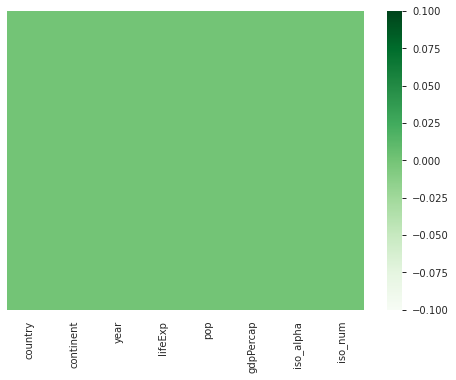

In [14]:
import seaborn as sns
sns.heatmap(gm.isnull(), yticklabels = False, cmap = "Greens")

It was already known that the dataset do not have any null value.... this is just an another way to check the null values as at times, with huge datasets, the columns in the middle having null values are not printed out. In such cases the visualisation used above proves to be really good.

========================================================================================================================

Also from the report we get to know that there are three categorical data i.e. country, continent, iso_alpha. 

Understanding the data in a better way

In [15]:
gm.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap',
       'iso_alpha', 'iso_num'],
      dtype='object')

In [16]:
unique_continent = gm.continent.unique()
unique_continent = unique_continent.tolist()
unique_continent

['Asia', 'Europe', 'Africa', 'Americas', 'Oceania']

In [17]:
type(unique_continent)

list

Understanding the data in a better way using cross tabulation

In [18]:
gm_edit = gm.copy()

In [19]:
gm_edit.drop(['year', 'lifeExp', 'gdpPercap','iso_alpha', 'iso_num'], axis = 1, inplace = True)
gm_edit.head()

country continent       pop
0  Afghanistan      Asia   8425333
1  Afghanistan      Asia   9240934
2  Afghanistan      Asia  10267083
3  Afghanistan      Asia  11537966
4  Afghanistan      Asia  13079460

In [20]:
gm.pivot_table(index=['continent'], aggfunc='size')

continent
Africa      624
Americas    300
Asia        396
Europe      360
Oceania      24
dtype: int64

In [21]:
ctr1 = gm['country'].loc[gm['continent'] == 'Africa'].unique()
print("Countries in Africa: ", ctr1)
print("\nTotal number of countries in Africa: ", len(ctr1))

Countries in Africa:  ['Algeria' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Djibouti' 'Egypt' 'Equatorial Guinea'
 'Eritrea' 'Ethiopia' 'Gabon' 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau'
 'Kenya' 'Lesotho' 'Liberia' 'Libya' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Mauritius' 'Morocco' 'Mozambique' 'Namibia' 'Niger'
 'Nigeria' 'Reunion' 'Rwanda' 'Sao Tome and Principe' 'Senegal'
 'Sierra Leone' 'Somalia' 'South Africa' 'Sudan' 'Swaziland' 'Tanzania'
 'Togo' 'Tunisia' 'Uganda' 'Zambia' 'Zimbabwe']

Total number of countries in Africa:  52


In [22]:
ctr2 = gm['country'].loc[gm['continent'] == 'Americas'].unique()
print("Countries in Americas: ", ctr2)
print("\nTotal number of countries in Americas: ", len(ctr2))

Countries in Americas:  ['Argentina' 'Bolivia' 'Brazil' 'Canada' 'Chile' 'Colombia' 'Costa Rica'
 'Cuba' 'Dominican Republic' 'Ecuador' 'El Salvador' 'Guatemala' 'Haiti'
 'Honduras' 'Jamaica' 'Mexico' 'Nicaragua' 'Panama' 'Paraguay' 'Peru'
 'Puerto Rico' 'Trinidad and Tobago' 'United States' 'Uruguay' 'Venezuela']

Total number of countries in Americas:  25


In [23]:
ctr3 = gm['country'].loc[gm['continent'] == 'Asia'].unique()
print("Countries in Asia: ", ctr3)
print("\nTotal number of countries in Asia: ", len(ctr3))

Countries in Asia:  ['Afghanistan' 'Bahrain' 'Bangladesh' 'Cambodia' 'China'
 'Hong Kong, China' 'India' 'Indonesia' 'Iran' 'Iraq' 'Israel' 'Japan'
 'Jordan' 'Korea, Dem. Rep.' 'Korea, Rep.' 'Kuwait' 'Lebanon' 'Malaysia'
 'Mongolia' 'Myanmar' 'Nepal' 'Oman' 'Pakistan' 'Philippines'
 'Saudi Arabia' 'Singapore' 'Sri Lanka' 'Syria' 'Taiwan' 'Thailand'
 'Vietnam' 'West Bank and Gaza' 'Yemen, Rep.']

Total number of countries in Asia:  33


In [24]:
ctr4 = gm['country'].loc[gm['continent'] == 'Europe'].unique()
print("Countries in Europe: ", ctr4)
print("\nTotal number of countries in Europe: ", len(ctr4))

Countries in Europe:  ['Albania' 'Austria' 'Belgium' 'Bosnia and Herzegovina' 'Bulgaria'
 'Croatia' 'Czech Republic' 'Denmark' 'Finland' 'France' 'Germany'
 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Montenegro' 'Netherlands'
 'Norway' 'Poland' 'Portugal' 'Romania' 'Serbia' 'Slovak Republic'
 'Slovenia' 'Spain' 'Sweden' 'Switzerland' 'Turkey' 'United Kingdom']

Total number of countries in Europe:  30


In [25]:
ctr5 = gm['country'].loc[gm['continent'] == 'Oceania'].unique()
print("Countries in Oceania: ", ctr5)
print("\nTotal number of countries in Oceania: ", len(ctr5))

Countries in Oceania:  ['Australia' 'New Zealand']

Total number of countries in Oceania:  2


To understand in depth information like population of a continent or a country in a particular year.... click on the respective tag
For example. if you wish to know more about Asia, click on Asia.
To visualize the plot in a better way, say you wish to know more about India, then click on India. This will return you all info of population in India. 
Also you can hover the mouse pointer over any of the required field and you will get the information for the same.

To go back to the previous chart, click again on the same field you chose earlier. Like click again on India and then Asia and you are back to the original chart...

In [26]:
plt.figure(figsize = (15,10))
fig = px.sunburst(gm, path=['continent', 'country', 'year'], values='pop', color='continent',
                  color_discrete_map={'Asia':'blue', 'Europe':'green', 'Africa':'red', 'Americas':'orange', 'Oceania':'black'}, 
                  title = "Population Distribution")
fig.show()


<Figure size 1080x720 with 0 Axes>

========================================================================================================================

Oobserving the trend in population change in the continents individually and the top two countries with highest population according to the data set!

# Bar plot Visualisation

The below projections are dynamic where you can 

1) Download Plot as a png</br>

2) Zoom</br>

3) Pan </br>

4) Box Select</br>

5) Lasso Select</br>

6) Zoom in </br>

7) Zoom out</br>

8) Autoscale</br>

9) Reset Axis</br>

10) Toggle Spike Lines</br>

11) Show Closest Data on Hover</br>

12) Compare data on hover</br>

In [27]:
# Hover over the bar to get the exact data
df_asia =gm.query("continent == 'Asia'")  # query() method queries the columns of a DataFrame with a boolean expression.
fig = px.bar(df_asia, x='year', y='pop', height=450, title = "Population of Asia", color = 'country')
fig.show()

In the above plot, hover the mouse pointer over various colored blocks where each coloured block represent a country of Asia. Year by year the population of most of the countries have been observed to be increasing. 

In [28]:
# Hover over the bar to get the exact data
df_india = gm.query("country == 'India'")
fig = px.bar(df_india, x='year', y='pop',
             hover_data=['lifeExp', 'gdpPercap', 'iso_alpha', 'iso_num'], height=450, title = "Population of India", color = 'country')
fig.show()

In [29]:
df_china = gm.query("country == 'China'")
fig = px.bar(df_china, x='year', y='pop',
             hover_data=['lifeExp', 'gdpPercap', 'iso_alpha', 'iso_num'], color='pop',
             labels={'pop':'Population'}, height=500, title = "Population of China")
fig.show()

In [30]:
# Hover over the bar to get the exact data
df_americas =gm.query("continent == 'Americas'")
fig = px.bar(df_americas, x='year', y='pop', height=450, title = "Population of Americas", color = 'country')
fig.show()

In [31]:
# Hover over the bar to get the exact data
df_us = gm.query("country == 'United States'")
fig = px.bar(df_us, x='year', y='pop',
             hover_data=['lifeExp', 'gdpPercap', 'iso_alpha', 'iso_num'], height=450, title = "Population of United States", color = 'country')
fig.show()

In [32]:
df_brazil = gm.query("country == 'Brazil'")
fig = px.bar(df_brazil, x='year', y='pop',
             hover_data=['lifeExp', 'gdpPercap', 'iso_alpha', 'iso_num'], color='pop',
             labels={'pop':'Population'}, height=500, title = "Population of Brazil")
fig.show()

In [33]:
# Hover over the bar to get the exact data
df_africa =gm.query("continent == 'Africa'")
fig = px.bar(df_africa, x='year', y='pop', height=450, title = "Population of Africa", color = 'country')
fig.show()

In [34]:
# Hover over the bar to get the exact data
df_nigeria = gm.query("country == 'Nigeria'")
fig = px.bar(df_nigeria, x='year', y='pop',
             hover_data=['lifeExp', 'gdpPercap', 'iso_alpha', 'iso_num'], height=450, title = "Population of Nigeria", color = 'country')
fig.show()

In [35]:
df_egypt = gm.query("country == 'Egypt'")
fig = px.bar(df_egypt, x='year', y='pop',
             hover_data=['lifeExp', 'gdpPercap', 'iso_alpha', 'iso_num'], color='pop',
             labels={'pop':'Population'}, height=500, title = "Population of Egypt")
fig.show()

In [36]:
# Hover over the bar to get the exact data
df_europe =gm.query("continent == 'Europe'")
fig = px.bar(df_europe, x='year', y='pop', height=450, title = "Population of Europe", color = 'country')
fig.show()

In [37]:
# Hover over the bar to get the exact data
df_germany = gm.query("country == 'Germany'")
fig = px.bar(df_germany, x='year', y='pop',
             hover_data=['lifeExp', 'gdpPercap', 'iso_alpha', 'iso_num'], height=450, title = "Population of Germany", color = 'country')
fig.show()

In [38]:
df_uk = gm.query("country == 'United Kingdom'")
fig = px.bar(df_uk, x='year', y='pop',
             hover_data=['lifeExp', 'gdpPercap', 'iso_alpha', 'iso_num'], color='pop',
             labels={'pop':'Population'}, height=500, title = "Population of 'United Kingdom")
fig.show()

On seeing the above two plots, it is observed that the population growth rate in the above two countries is quite stable and not increasing steeply. It seems like the number of birthd rate and death rate is approximately equal keeping the total population growth over years to be seemingly quite stagnant.

In [39]:
# Hover over the bar to get the exact data
df_oceania =gm.query("continent == 'Oceania'")
fig = px.bar(df_oceania, x='year', y='pop', height=450, title = "Population of Oceania", color = 'country')
fig.show()

In [40]:
# Hover over the bar to get the exact data
df_australia = gm.query("country == 'Australia'")
fig = px.bar(df_australia, x='year', y='pop',
             hover_data=['lifeExp', 'gdpPercap', 'iso_alpha', 'iso_num'], height=450, title = "Population of Australia", color = 'country')
fig.show()

In [41]:
df_nz = gm.query("country == 'New Zealand'")
fig = px.bar(df_nz, x='year', y='pop',
             hover_data=['lifeExp', 'gdpPercap', 'iso_alpha', 'iso_num'], color='pop',
             labels={'pop':'Population'}, height=500, title = "Population of 'New Zealand")
fig.show()

In [42]:
df_nz

country continent  year  lifeExp      pop    gdpPercap iso_alpha  \
1092  New Zealand   Oceania  1952   69.390  1994794  10556.57566       NZL   
1093  New Zealand   Oceania  1957   70.260  2229407  12247.39532       NZL   
1094  New Zealand   Oceania  1962   71.240  2488550  13175.67800       NZL   
1095  New Zealand   Oceania  1967   71.520  2728150  14463.91893       NZL   
1096  New Zealand   Oceania  1972   71.890  2929100  16046.03728       NZL   
1097  New Zealand   Oceania  1977   72.220  3164900  16233.71770       NZL   
1098  New Zealand   Oceania  1982   73.840  3210650  17632.41040       NZL   
1099  New Zealand   Oceania  1987   74.320  3317166  19007.19129       NZL   
1100  New Zealand   Oceania  1992   76.330  3437674  18363.32494       NZL   
1101  New Zealand   Oceania  1997   77.550  3676187  21050.41377       NZL   
1102  New Zealand   Oceania  2002   79.110  3908037  23189.80135       NZL   
1103  New Zealand   Oceania  2007   80.204  4115771  25185.00911       NZL   

      iso_num  
1092      554  
1093      554  
1094      554  
1095      554  
1096      554  
1097      554  
1098      554  
1099      554  
1100      554  
1101      554  
1102      554  
1103      554

==========================================================================================================================


In [43]:
pip install bubbly

  Created wheel for bubbly: filename=bubbly-1.0.2-py3-none-any.whl size=5428 sha256=5268896aa706614ee960cd4f0c4c11db07fe9ed69a62ca121a288c16e35a64ef
  Stored in directory: /root/.cache/pip/wheels/f3/a2/b4/e8c5235bb3da5f686d87429eac448bead93e17c7ac0d7cfc2d
Successfully built bubbly
Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install chart-studio 

     |████████████████████████████████| 64 kB 1.4 MB/s 
Note: you may need to restart the kernel to use updated packages.


The plotly.plotly module is deprecated, so for resolving it please install the chart-studio package and use the chart_studio.plotly module instead. or you can even install the latest version of plotly )

In [45]:
pip install plotly==4.6.0

     |████████████████████████████████| 7.1 MB 5.1 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.5.4
    Uninstalling plotly-4.5.4:
      Successfully uninstalled plotly-4.5.4
Note: you may need to restart the kernel to use updated packages.


In [46]:
from bubbly.bubbly import bubbleplot 
#from plotly.plotly import iplot  
from plotly.offline import iplot
#from chart_studio.plotly import  iplot

figure = bubbleplot(dataset=gm, x_column='gdpPercap', y_column='lifeExp', 
    bubble_column='country', time_column='year', size_column='pop', color_column='continent', 
    x_title="GDP per Capita", y_title="Life Expectancy", title='Global Statistical Indicators',
    x_logscale=True, scale_bubble=3, height=650)

iplot(figure, config={'scrollzoom': True})


=======================================================================================================================

# Part 2 - to be contd......
Coming Soon


# The upcoming parts of this series will include more sophiticated and dynamic visualisations to play around with... 
If you wish to receive the notification about the same, do follow me and if you liked the work then surely give an upvote. 

Also please give suggestions on what type of work do you wish me to make public and also suggestions on how to improve my work will be much appreciated...\\
